In [8]:
import spacy
import networkx as nx


en_nlp = spacy.load('en_core_web_sm')

doc = en_nlp("the hospital admitted the patient with cancer because she required intensive care")

edges = []
for tok in doc:
    edges.extend([(tok.i, child.i) for child in tok.children])


g = nx.Graph()
g.add_edges_from(edges)

distance_matrix = nx.floyd_warshall_numpy(g)
idx_labels = [str(tok) for toc in doc]

In [6]:
spacy.displacy.render(doc, style="dep")

In [4]:
import pandas as pd
from itertools import groupby
from ast import literal_eval
import networkx as nx


data_file = open("/Users/aakritilakshmanan/Downloads/testing.txt", "r", encoding="utf-8")
data = data_file.read().splitlines()
data = [ a[1:] if "_" in a else a for a in data]

for idx, val in enumerate(data):
    if "(" in val:
        data[idx] = (str(val[val.find("(")+1:val.find(",")]), str(val[val.find(",")+2:-1]))


i = (list(g) for _, g in groupby(data, key=''.__ne__))
print(i)
split_file = [a + b for a, b in zip(i, i)]

split = [list(g) for m, g in groupby(data, key=lambda x: x != "") if m]


<generator object <genexpr> at 0x7fde79ea27b0>


['the athlete trained for the competition in the gym which was very tiring', ('athlete', 'the'), ('trained', 'athlete'), ('trained', 'competition'), ('competition', 'for'), ('competition', 'the'), ('competition', 'gym'), ('competition', 'tiring'), ('gym', 'in'), ('gym', 'the'), ('tiring', 'which'), ('tiring', 'was'), ('tiring', 'very')]
['the', 'athlete', 'trained', 'for', 'the-2', 'competition', 'in', 'the-3', 'gym', 'which', 'was', 'very', 'tiring']
['the', 'athlete', 'trained', 'for', 'the-2', 'competition', 'in', 'the-3', 'gym', 'which', 'was', 'very', 'tiring']


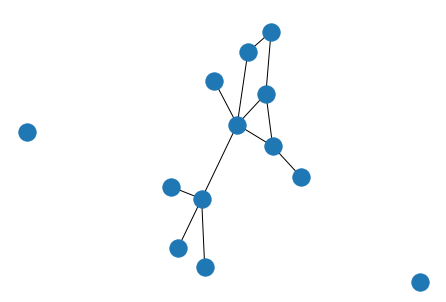

In [6]:
distance_matrix = []
dicts = []

for val in split:
    print(val)
    G=nx.Graph()
    nodes = val[0].split(" ")
    nodes = [a if not (s:=sum(j == a for j in nodes[:i])) else f'{a}-{s+1}'
    for i, a in enumerate(nodes)]
    print(nodes)
    G.add_nodes_from(nodes)
    G.add_edges_from(val[1:])
    print(G.nodes())
    nx.draw(G)
    distance_matrix.append(nx.floyd_warshall_numpy(G))

In [66]:
from numpy import inf

for matrix in distance_matrix:

    matrix[matrix == inf] = 2*len(matrix)

In [14]:
import numpy as np

count =0
for i in range(0, len(distance_matrices), 2):

    if not np.array_equal(distance_matrices[i],distance_matrices[i+1]):
        count +=1

print(count)

6


In [17]:
import pickle
with open('/Users/aakritilakshmanan/Downloads/distance_hospital.pkl', 'wb') as f:
    pickle.dump(distance_matrix, f)

In [22]:
from nltk import Tree


en_nlp = spacy.load('en_core_web_sm')

doc = en_nlp("The quick brown fox jumps over the lazy dog.")

def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_


[to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]

        jumps                    
  ________|______________         
 |        |             over     
 |        |              |        
 |       fox            dog      
 |    ____|_____      ___|____    
 .  The quick brown the      lazy



[None]

AttributeError: 'str' object has no attribute 'reverse'

In [79]:
data_file = open("/Users/aakritilakshmanan/Downloads/paper_sentences.txt", "r", encoding="utf-8")
data = data_file.read().splitlines()
data = [line for line in data if line != ""]
print(data)

['The thieves stole all the paintings in the (i) museum (NPA) (ii) night (VPA) (nonintrinsic) while the guard slept.', 'The couple admired the house with a (i) garden (NPA) (ii) friend (VPA) (nonintrinsic) but knew that it was overpriced.', 'The tourist learned the route through the (i) mountains (NPA) (ii) interpreter (VPA) (intrinsic) while traveling on vacation.', 'The administrator announced the cuts in the (i) budget (NPA) (ii) meeting (VPA) (nonintrinsic) even though he knew it would create hard feelings.', 'The engineers designed the bridge over the (i) river (NPA) (ii) summer (VPA) (nonintrinsic) but a year passed before it was built.', 'The report described the government’s programs in (i) education (NPA) (ii) detail (VPA) (intrinsic) but most people ignored it.', 'The police arrested the mastermind behind the (i) crimes (NPA) (ii) hideout (VPA) (nonintrinsic) but they forgot to read him his rights.', 'The spy had the plans for a (i) weapon (NPA) (ii) price (VPA) (intrinsic) b

In [2]:
import regex as re
data_file = open("/Users/aakritilakshmanan/Downloads/paper_sentences.txt", "r", encoding="utf-8")
data = data_file.read().splitlines()
data = [line for line in data if line != ""]

clean_Sentences = []
for ex in data:
    start = ex[:ex.find("(")]
    end = ex[ex.rfind(")")+1:]
    possible = re.findall("([a-zA-Z]+(?![^(]*\)))", ex[ex.find("("):ex.rfind(")")+1])

    clean_Sentences.append(start + possible[0] + end)
    clean_Sentences.append(start + possible[1] + end)




In [9]:
len(clean_Sentences)

58

In [6]:
import spacy
import networkx as nx


en_nlp = spacy.load('en_core_web_sm')
distance_matrices = []
prev = 0
for idx, sent in enumerate(clean_Sentences):
    doc = en_nlp(sent)

    edges = []
    for tok in doc:
        edges.extend([(tok.i, child.i) for child in tok.children])

    g = nx.Graph()
    g.add_edges_from(edges)

    distance_matrix = nx.floyd_warshall_numpy(g)
    idx_labels = [str(toc) for toc in doc]
    distance_matrices.append(distance_matrix)
    


In [8]:
len(distance_matrices)

58

In [36]:
spacy.displacy.render(doc, style="dep")

[(1, 2), (2, 3), (4, 5), (5, 3), (6, 3), (7, 6), (8, 10), (9, 10), (10, 3), (11, 12), (12, 10)]
[(1, 2), (2, 3), (4, 5), (5, 3), (6, 5), (7, 6), (8, 10), (9, 10), (10, 3), (11, 12), (12, 10)]


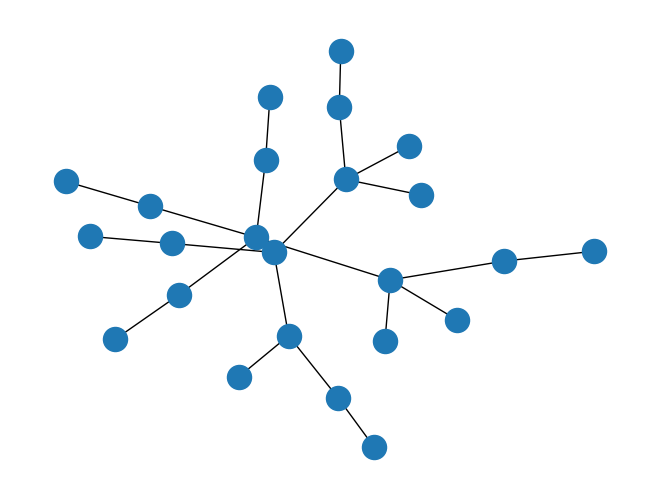

In [15]:
#the previous parser broke with repeats, so here i am, trying again :)

import pandas as pd

data = pd.read_csv("/Users/aakritilakshmanan/Downloads/hospital.txt", sep = "\t", header = None)

distance_matrix = []
indices = [i for i in range(len(data[0])) if data[0][i] == 1]

for idx, num in enumerate(indices):
    if idx == len(indices)-1:
        newdf = data.iloc[num:]
    else:
        newdf = data.iloc[num:indices[idx+1]]
    edges = list(zip(newdf[0],[int(val) if val != "_" else "_" for val in newdf[6]]))
    for tup in edges:
        if "_" in tup:
            edges.remove(tup)

    G=nx.Graph()
    #G.add_nodes_from(list(newdf[0]))
    #print(edges)
    G.add_edges_from(edges)
    #nx.draw(G)
    distance_matrix.append(nx.floyd_warshall_numpy(G))

In [16]:
from numpy import inf

for matrix in distance_matrix:
    matrix[matrix == inf] = 2*len(matrix)

    

2

In [22]:
import pickle
with open('/Users/aakritilakshmanan/Downloads/distance_hospital.pkl', 'wb') as f:
    pickle.dump(distance_matrix, f)

[0, 16, 32, 45, 58, 67, 76, 89]

In [38]:
testing = data.iloc[indices[2]:indices[3]]

testing[0]

32     1
33     2
34     3
35     4
36     5
37     6
38     7
39     8
40     9
41    10
42    11
43    12
44    13
Name: 0, dtype: int64

In [34]:
data.index

RangeIndex(start=0, stop=102, step=1)